<a href="https://colab.research.google.com/github/mamathasara/AICTE-Internship---E-Waste-Generation-Classification-/blob/main/Week1_E_Waste_Generation_Classification%E2%80%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Waste Image Classification Using EfficientNetV2B0**
#**(Transfer Learning)**
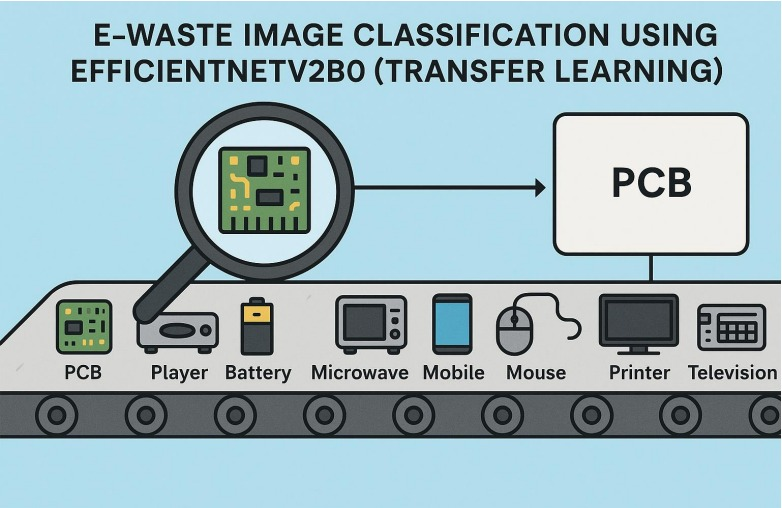

**Problem Statement and Description**

E-waste (electronic waste) is rapidly becoming a serious environmental and health issue around the world. Proper sorting and categorization of e-waste is essential for efficient recycling and disposal, but manual classification is error-prone and labor-intensive.

This project aims to build an automated e-waste classification system using artificial intelligence and machine learning. By training a deep learning model on images of different types of e-waste, we can identify and categorize them accurately.

**Goal:**

Use image classification with EfficientNetV2B0 to classify e-waste into 10 distinct categories to support better sorting and recycling automation.

**Dataset Overview**

Dataset Name: E-Waste Image Dataset

Source: https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset

Each directory contains 10 subfolders, each representing one class of e-waste:


PCB (Printed Circuit Board)

Player

Battery

Microwave

Mobile

Mouse

Printer

Television

Washing Machine

Keyboard

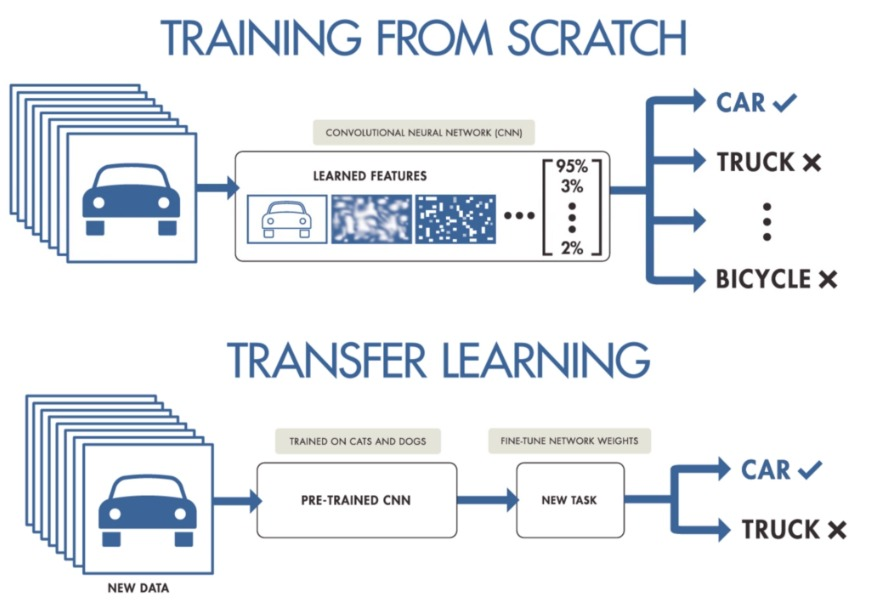

**What is Transfer Learning?**

Transfer Learning: Transfer Learning is a machine learning technique where a pre-trained model developed for a specific task is reused as the starting point for a model on a different but related task. It also allows us to build accurate models in a time-saving way by starting from patterns learned when solving a different problem. This approach is beneficial when there is limited data for the new task, as the pre-trained model already has learned features that can be adapted. Transfer learning can significantly improve models' performance and efficiency in domains like computer vision and natural language processing.


**Benefits**

Reduces training time — you don't start from scratch.
Leverages learned features from large datasets (like ImageNet).
Improves performance, especially with limited data.

**How Does It Work?**

Load a pretrained model (e.g., ResNet, EfficientNet).
Freeze the pretrained layers (optional).
Add new layers for your custom task.
Train on your new dataset (can also fine-tune).


#**EfficientNetV2B0: Transfer Learning Backbone**

**Overview**

EfficientNetV2 is an optimized family of models introduced by Google for efficient training and inference.

**Key Features:**

Fused MBConv blocks — improve training speed and GPU efficiency.
Progressive learning — gradually increases input size during training.
Better accuracy with fewer parameters and FLOPs.

**Why Use EfficientNetV2B0?**

Lightweight - Small model size, ideal for mobile & edge devices
Fast - Quick training and inference
Pretrained on ImageNet - Excellent feature extraction baseline
High Accuracy - Competitively performs even in low-resource setups

In [2]:
# Install TensorFlow package
!pip install tensorflow


**Core Libraries**

tensorflow: For deep learning model building and training.

numpy: For numerical operations and array manipulation.

matplotlib.pyplot: For plotting training curves and results.

In [27]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

**Format: Folder-based image classification dataset**

Train/: Images used for training the model

Test/: Images used for model evaluation

Validation/: Images used to fine-tune and validate the model

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!unzip "/content/drive/MyDrive/Edunet4/Ewaste.zip" -d "/content/drive/MyDrive/Edunet4/Ewaste"


Archive:  /content/drive/MyDrive/Edunet4/Ewaste.zip
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_106.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_128.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_148.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_152.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_174.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_177.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_190.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_192.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test/Battery/battery_211.jpg  
  inflating: /content/drive/MyDrive/Edunet4/Ewaste/modifi

In [34]:
trainpath = "/content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/train"
validpath = "/content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/val"
testpath  = "/content/drive/MyDrive/Edunet4/Ewaste/modified-dataset/test"


**1. Explore and Understand the Data**

Load image dataset using tools like image_dataset_from_directory.

Visualize sample images from each class.

Check the number of images per class to ensure balance.

Understand image dimensions, color channels, and class labels.

**Load image dataset using tools like**

image_dataset_from_directory.


**Split data into training, validation, and testing sets.**

tf.keras.utils.image_dataset_from_directory(...)

Used to load images from a directory where each subfolder represents a class.

**path**

Root directory path containing one subdirectory per class.

**shuffle=True**

Randomly shuffles the image data. Useful during training to prevent the model from learning the order of the data.

**image_size=(128, 128)**

Resizes all loaded images to this target size (width, height).
This must match the input size expected by the model.

**batch_size=32**

Number of images per batch during training.
This affects memory usage and the frequency of model updates.

**validation_split=False**

If set to a float (e.g., 0.2), splits a portion of the data for validation.
If False, no split is applied.

In [35]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)


Found 2400 files belonging to 10 classes.


In [36]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)


Found 300 files belonging to 10 classes.


In [37]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)


Found 300 files belonging to 10 classes.


In [38]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)
10

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


10

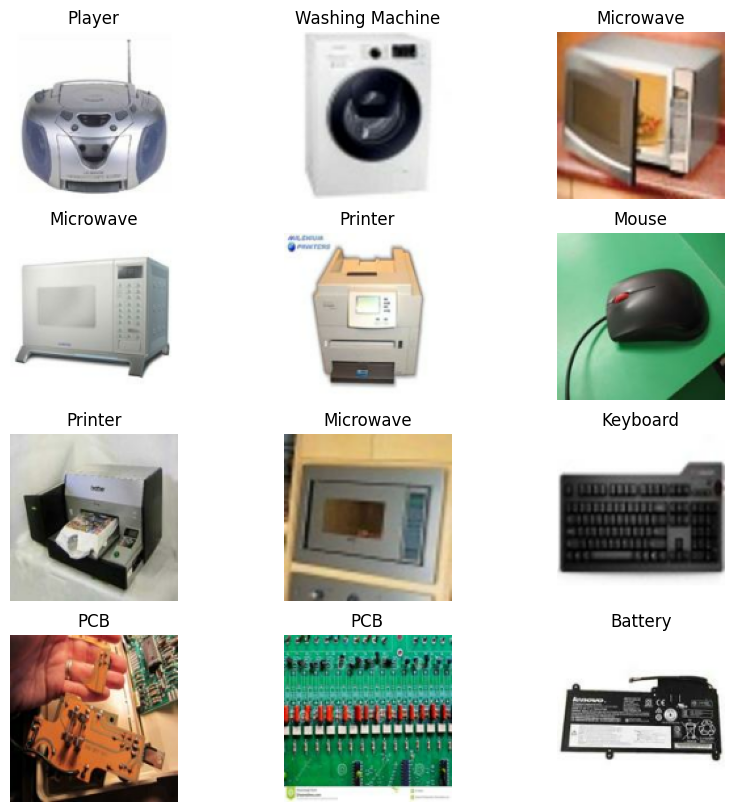

In [39]:
# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")

Check the number of images per class to ensure balance

Understand image properties like Image dimensions, Class labels

In [40]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """

    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

In [46]:
import os

class_counts = {}

# Loop through each class folder in your training path
for class_name in os.listdir(trainpath):
    class_dir = os.path.join(trainpath, class_name)
    if os.path.isdir(class_dir):
        count = len(os.listdir(class_dir))  # Count the number of images
        class_counts[class_name] = count

print(class_counts)

{'Battery': 240, 'Keyboard': 240, 'Microwave': 240, 'Mobile': 240, 'Mouse': 240, 'PCB': 240, 'Player': 240, 'Printer': 240, 'Television': 240, 'Washing Machine': 240}


In [48]:
class_names = list(class_counts.keys())
counts = list(class_counts.values())


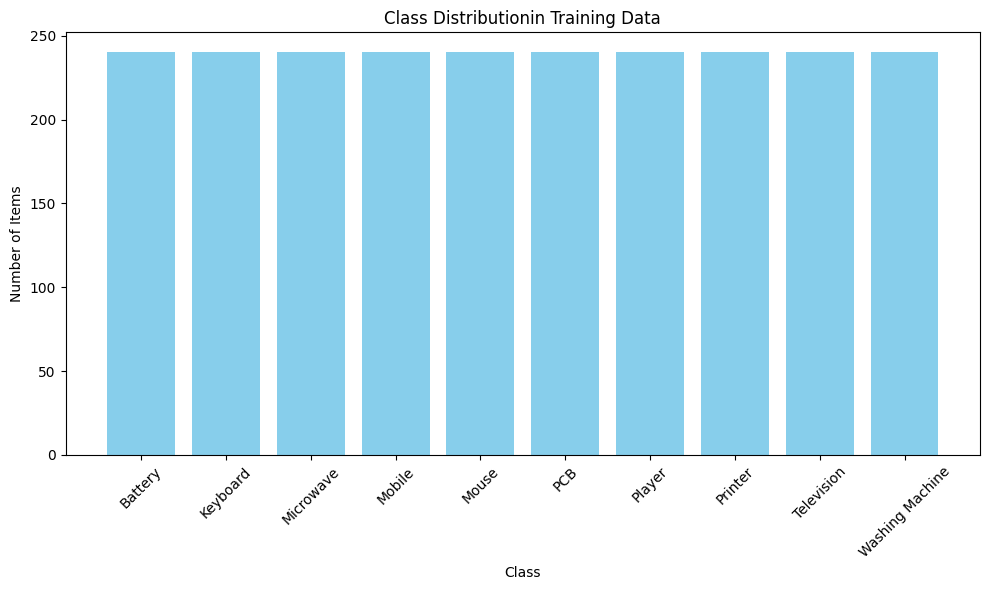

In [52]:
    # Create the bar plot

    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(class_names, counts, color='skyblue')  # Draw bars with class counts
    plt.xlabel("Class")  # X-axis label
    plt.ylabel("Number of Items")  # Y-axis label
    plt.title("Class Distributionin Training Data")  # Plot title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot

In [53]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_distribution(dataset, title="Class Distribution"):
    labels = []

    for images, lbls in dataset:
        labels.extend(lbls.numpy())

    class_counts = Counter(labels)
    class_names = [dataset.class_names[i] for i in class_counts.keys()]
    counts = list(class_counts.values())

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, counts, color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Items")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


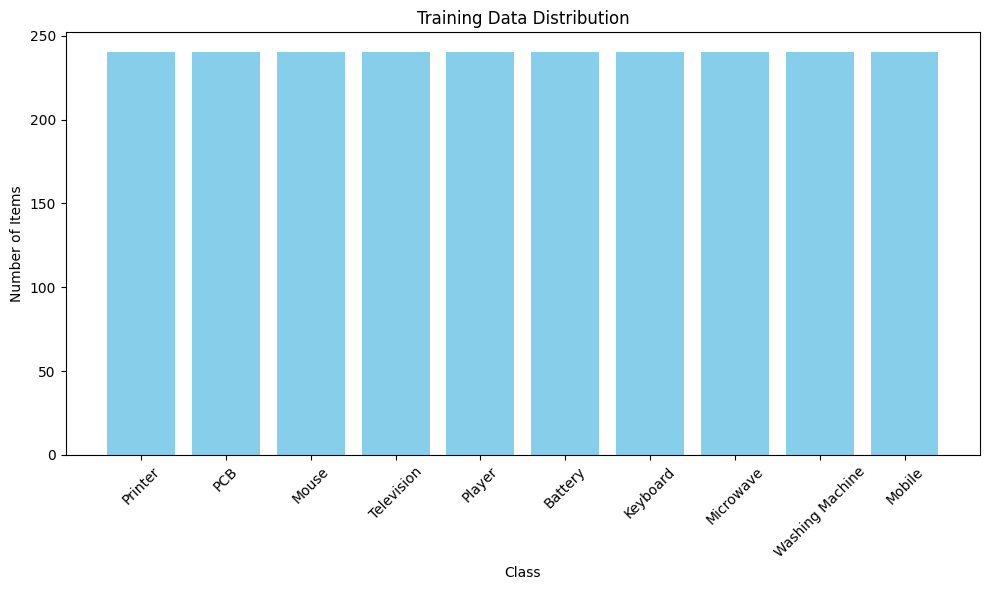

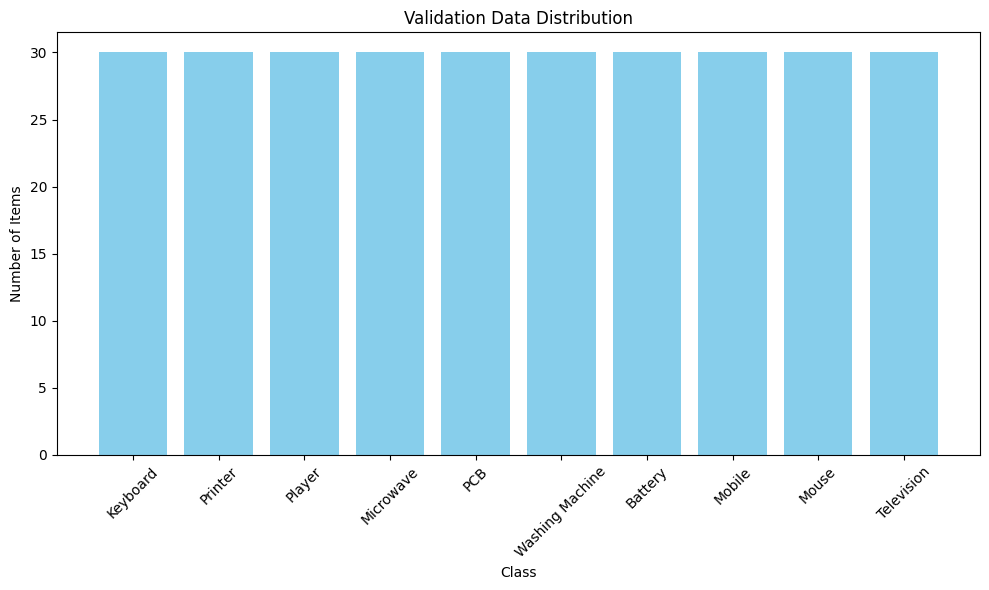

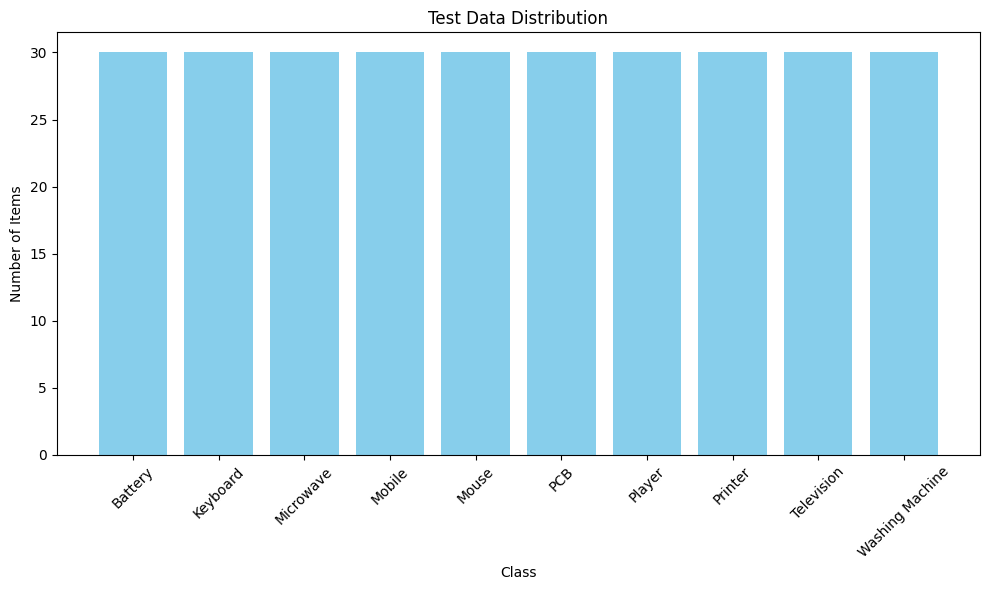

In [55]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")


**2. Data Preprocessing / Preparation**

Resize and rescale images.

Apply data augmentation (e.g., RandomFlip, RandomRotation, RandomZoom) to improve generalization.

Normalize images (using preprocess_input if using pre-trained models like EfficientNet).

In [56]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

**3. Model Selection**

Choose a base model: Custom CNN or Transfer Learning (e.g., EfficientNetV2B0).

Decide whether to use pre-trained weights (e.g., ImageNet).

Define whether layers should be trainable or frozen during initial training.

In [57]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**4. Model Training**

Build the model architecture using Sequential or Functional API.

Compile the model with loss function ( sparse_categorical_crossentropy), optimizer (e.g., Adam), and evaluation metrics (accuracy).


**5. Model Tuning and Optimization**

Tune hyperparameters: learning rate, batch size, number of layers, dropout rate.

Use callbacks: EarlyStopping,
Optionally perform fine-tuning on pre-trained models by unfreezing some layers.

**Model Architecture and Layer Utilities**

**Sequential:** A simple way to build models by stacking layers one after the other in a linear fashion.


**RandomFlip:** A data augmentation layer that flips input images horizontally or vertically at random, helping the model generalize better.

**RandomRotation:** Randomly rotates images by a specified angle range during training to make the model invariant to orientation.

**RandomZoom:** Applies random zoom-in or zoom-out to training images, helping the model recognize objects at various scales.

**Dropout:** A regularization method that randomly "drops" (sets to zero) a fraction of input units during training to prevent overfitting.

**GlobalAveragePooling2D:** Reduces each feature map to a single number by taking the average, reducing model parameters and helping prevent overfitting.

**Dense:** A fully connected neural network layer used to learn complex features and typically found at the end of the model for classification.

**Input:** Specifies the input shape and data type for the model; acts as the starting point of the model architecture.

**EfficientNetV2B0:** A pre-trained convolutional neural network from the EfficientNetV2 family, known for being lightweight and high-performing, commonly used for transfer learning.

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

**Callbacks**

EarlyStopping: To stop training when validation performance stops improving.

In [60]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

Train the model using .fit() with appropriate epochs, batch_size, and callbacks like EarlyStopping.

In [61]:
# Set the number of epochs to train the model
epochs = 15

# Train the model on the training dataset 'datatrain'
history = model.fit(
    datatrain,                      # Training data generator or dataset
    validation_data=datavalid,      # Validation data generator or dataset
    epochs=epochs,                  # Number of training epochs
    batch_size=100,                 # Number of samples per gradient update
    callbacks=[early]               # List of callbacks to apply during training (e.g., early stopping)
)

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - Accuracy: 0.2611 - loss: 2.1311 - val_Accuracy: 0.7633 - val_loss: 1.0984
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - Accuracy: 0.7839 - loss: 0.9713 - val_Accuracy: 0.8967 - val_loss: 0.4871
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - Accuracy: 0.8616 - loss: 0.5118 - val_Accuracy: 0.9167 - val_loss: 0.3122
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - Accuracy: 0.9197 - loss: 0.3246 - val_Accuracy: 0.9467 - val_loss: 0.2357
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - Accuracy: 0.9340 - loss: 0.2444 - val_Accuracy: 0.9500 - val_loss: 0.2045
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - Accuracy: 0.9599 - loss: 0.1742 - val_Accuracy: 0.9467 - val_loss: 0.1857
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - Accuracy: 0.9522 - loss: 0.1640 - val_Accuracy: 0.9600 - val_loss: 0.1711
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - Accuracy: 0.9689 - loss: 0.1216 - val_Accuracy: 0.9633 - v

**Model Architechure of EfficientNETV2**

In [62]:
model.summary() # Print the architecture summary of the  model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [63]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

**Model Performance Visualization: Accuracy & Loss Trends**


In [64]:
### Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           # Training accuracy
val_acc = history.history['val_Accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

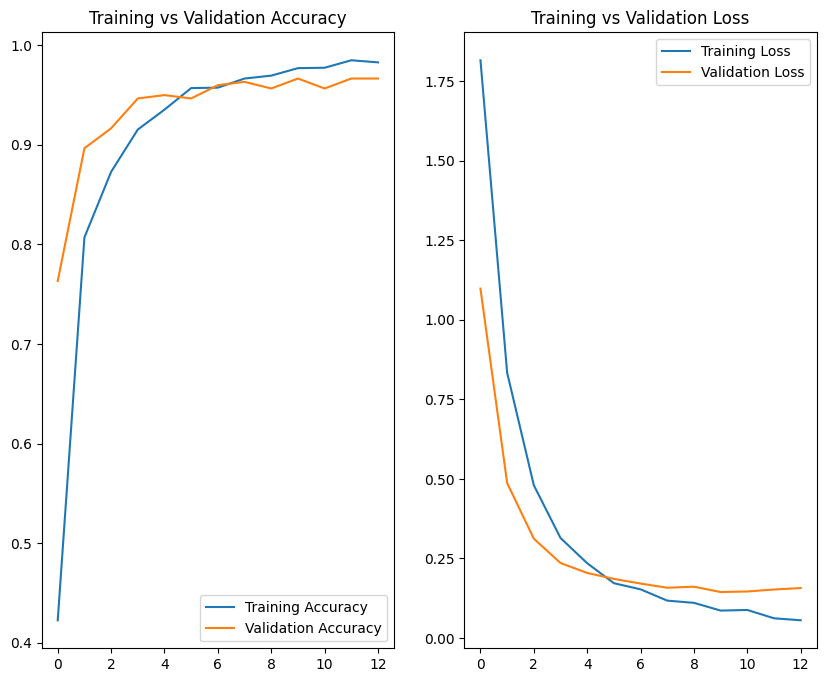

In [65]:
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 # Set overall figure size

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Show legend at lower right
plt.title('Training vs Validation Accuracy') # Set title for accuracy plot

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # Plot validation loss
plt.legend(loc='upper right')              # Show legend at upper right
plt.title('Training vs Validation Loss')    # Set title for loss plot

plt.show()                                  # Display the plots